In [1]:
from jax import numpy as jnp, jit
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def generate_big_matrix(sites = 20):
    A = jnp.array(np.random.rand(2**sites,2**sites))
    B = A + A.conj().T

    return B

def diagonalize(matrix):
    return jnp.linalg.eigh(matrix)

j_diagonalize = jit(diagonalize)

In [3]:
matrix = generate_big_matrix(3)

j_diagonalize(matrix)

(Array([-1.8268087 , -1.4196547 , -0.83530414, -0.01871365,  0.99905246,
         1.2140357 ,  1.7313071 ,  8.691386  ], dtype=float32),
 Array([[-0.28954697,  0.27703616,  0.33038476, -0.58959746,  0.17760743,
          0.46200183,  0.15979823,  0.3348264 ],
        [ 0.2656247 , -0.047735  ,  0.12408306, -0.09313751, -0.77272546,
         -0.09909505,  0.44097322,  0.31892297],
        [-0.580025  , -0.12890977, -0.31292254,  0.03350841,  0.17748196,
         -0.49202853,  0.3477377 ,  0.39165884],
        [ 0.64401966,  0.04321862, -0.38731208, -0.39633298,  0.3337451 ,
         -0.20510708, -0.06790455,  0.3438236 ],
        [-0.10935659, -0.1559155 ,  0.43324924, -0.14466847, -0.15031284,
         -0.40325886, -0.6857583 ,  0.31562972],
        [ 0.23698235, -0.5005389 ,  0.42495888,  0.40288395,  0.38134202,
          0.18282095,  0.22766002,  0.34600633],
        [-0.14549747, -0.26371297, -0.5066678 ,  0.14175038, -0.24346495,
          0.5441703 , -0.35429594,  0.3893058 ],
  

In [4]:
Ls = np.arange(8,21)
times = []
for L in Ls:
    mat = generate_big_matrix(L)
    start = time.time()
    diag_time = j_diagonalize(mat)
    stop = time.time()
    times.append(stop-start)


times = np.array(times)

2023-10-06 17:49:18.286831: W external/tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.00GiB (rounded to 4294967296)requested by op 
2023-10-06 17:49:18.288646: W external/tsl/tsl/framework/bfc_allocator.cc:497] *__________***********************************______________________________________________________


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 4294967296 bytes.

Text(0.5, 0, 'size LxL')

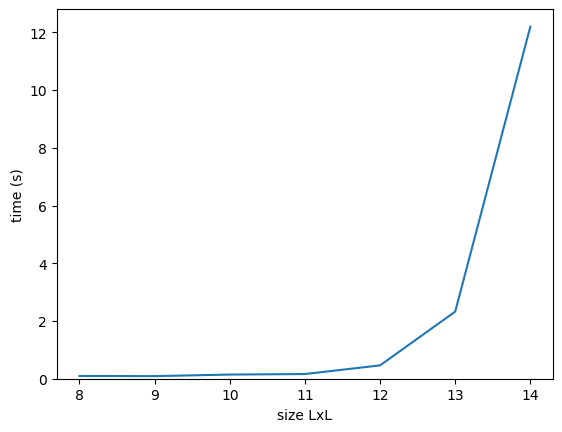

In [6]:
plt.plot(Ls[:len(times)], times)
plt.xticks(Ls[:len(times)])
plt.ylim(0,)
plt.ylabel('time (s)')
plt.xlabel('size LxL')

In [5]:
times

[0.09577250480651855,
 0.08994722366333008,
 0.1439969539642334,
 0.16224145889282227,
 0.46183156967163086,
 2.325885534286499,
 12.19972538948059]